In [1]:
!pip install -q -U python-mnist

In [2]:
import os
import utils
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST


DATA = '../data'
DATASETS = './datasets'

## MNIST

In [3]:
mnist_data = os.path.join(DATA, 'MNIST')

mnist = MNIST(mnist_data, return_type='numpy')
mnist.gz = True

mnist_x_train, mnist_y_train = mnist.load_training() # 60000 samples
mnist_x_test, mnist_y_test = mnist.load_testing()    # 10000 samples

mnist_x_train = mnist_x_train.astype(np.float32)
mnist_y_train = mnist_y_train.astype(np.int)
mnist_x_test = mnist_x_test.astype(np.float32)
mnist_y_test = mnist_y_test.astype(np.int)

assert(mnist_x_train.shape[0] == mnist_y_train.shape[0])
assert(mnist_x_test.shape[0] == mnist_y_test.shape[0])

In [4]:
utils.plot_info(mnist_x_train, mnist_y_train, "MNIST Training")
utils.plot_info(mnist_x_test, mnist_y_test, "MNIST Testing")

..... Info: MNIST Training Dataset .....
---------------------------------
    feature shape: (60000, 784)
    min value: 0.0, max value: 255.0

    target shape: (60000,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------

..... Info: MNIST Testing Dataset .....
---------------------------------
    feature shape: (10000, 784)
    min value: 0.0, max value: 255.0

    target shape: (10000,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------



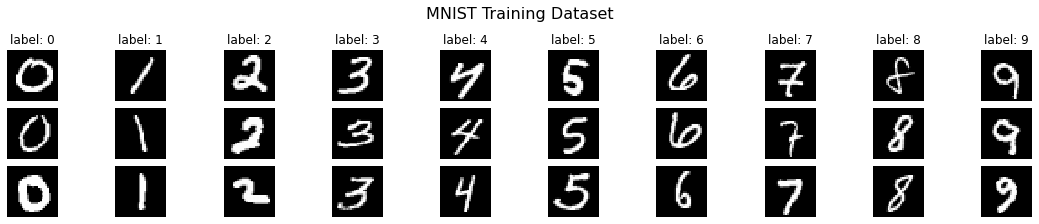

Total number of samples: 60000


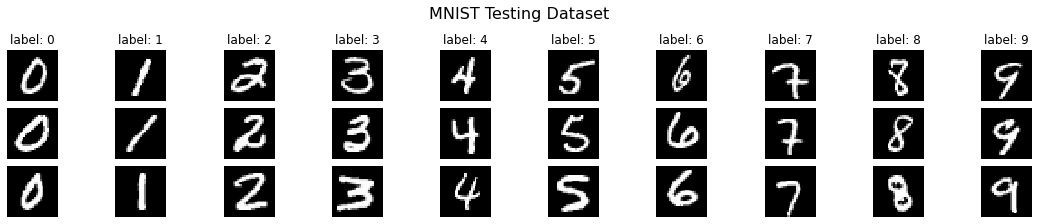

Total number of samples: 10000


In [5]:
utils.plot_random_samples(mnist_x_train, mnist_y_train, title="MNIST Training Dataset")
utils.plot_random_samples(mnist_x_test, mnist_y_test, title="MNIST Testing Dataset")

In [6]:
hdf5_filepath = os.path.join(DATASETS, "mnist.hdf5")
utils.store_hdf5(hdf5_filepath, mnist_x_train, mnist_y_train, mnist_x_test, mnist_y_test)

Creating HDF5 dataset and sotre it to: ./datasets/mnist.hdf5 ...
Done.


## USPS

In [7]:
usps_train = os.path.join(DATA, 'USPS/zip.train.gz')
usps_test = os.path.join(DATA, 'USPS/zip.test.gz')

# WARNING!!! The trainings datasets contains a space before the linebreak whitch is not in the testing data!
usps_x_train = np.loadtxt(usps_train, delimiter=' ', dtype=np.str)[:, 1:-1].astype(np.float32)
usps_y_train = np.loadtxt(usps_train, delimiter=' ', usecols=0, dtype=np.float).astype(np.int)

usps_x_test = np.loadtxt(usps_test, delimiter=' ', dtype=np.float32)[:, 1:]
usps_y_test = np.loadtxt(usps_test, delimiter=' ', usecols=0, dtype=np.float).astype(np.int)

assert(usps_x_train.shape[0] == usps_y_train.shape[0])
assert(usps_x_test.shape[0] == usps_y_test.shape[0])

In [8]:
utils.plot_info(usps_x_train, usps_y_train, "USPS Training")
utils.plot_info(usps_x_test, usps_y_test, "USPS Testing")

..... Info: USPS Training Dataset .....
---------------------------------
    feature shape: (7291, 256)
    min value: -1.0, max value: 1.0

    target shape: (7291,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------

..... Info: USPS Testing Dataset .....
---------------------------------
    feature shape: (2007, 256)
    min value: -1.0, max value: 1.0

    target shape: (2007,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------



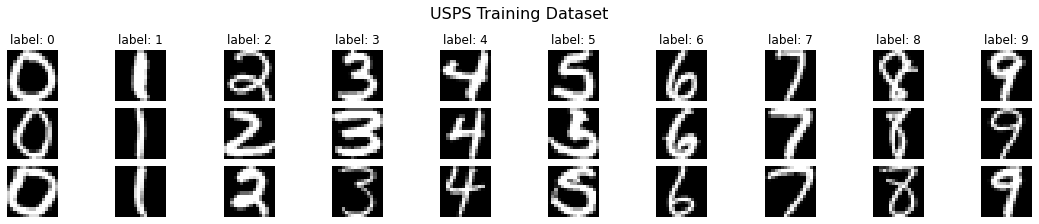

Total number of samples: 7291


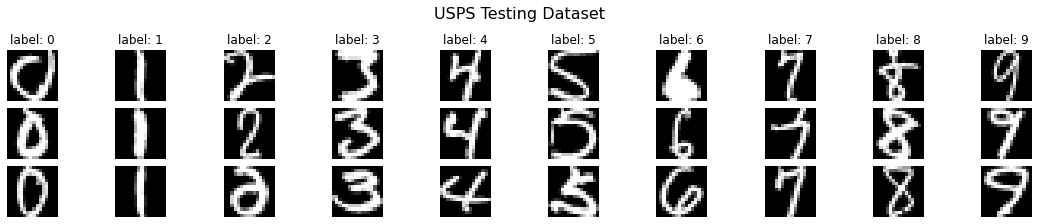

Total number of samples: 2007


In [9]:
utils.plot_random_samples(usps_x_train, usps_y_train, title="USPS Training Dataset")
utils.plot_random_samples(usps_x_test, usps_y_test, title="USPS Testing Dataset")

In [10]:
hdf5_filepath = os.path.join(DATASETS, "usps.hdf5")
utils.store_hdf5(hdf5_filepath, usps_x_train, usps_y_train, usps_x_test, usps_y_test)

Creating HDF5 dataset and sotre it to: ./datasets/usps.hdf5 ...
Done.


## ARDIS

In [11]:
ardis_x_train = np.loadtxt(os.path.join(DATA, 'ARDIS', 'ARDIS_DATASET_IV/ARDIS_train_2828.csv'), dtype=np.float)
ardis_y_train = np.loadtxt(os.path.join(DATA, 'ARDIS', 'ARDIS_DATASET_IV/ARDIS_train_labels.csv'), dtype=np.int)
ardis_x_test = np.loadtxt(os.path.join(DATA, 'ARDIS', 'ARDIS_DATASET_IV/ARDIS_test_2828.csv'), dtype=np.float)
ardis_y_test = np.loadtxt(os.path.join(DATA, 'ARDIS', 'ARDIS_DATASET_IV/ARDIS_test_labels.csv'), dtype=np.int)

ardis_x_train = ardis_x_train.astype(np.float32)
ardis_x_test = ardis_x_test.astype(np.float32)

ardis_y_train = np.argmax(ardis_y_train, axis=1)
ardis_y_test = np.argmax(ardis_y_test, axis=1)

In [12]:
utils.plot_info(ardis_x_train, ardis_y_train, "ARDIS Training")
utils.plot_info(ardis_x_test, ardis_y_test, "ARDIS Testing")

..... Info: ARDIS Training Dataset .....
---------------------------------
    feature shape: (6600, 784)
    min value: 0.0, max value: 255.0

    target shape: (6600,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------

..... Info: ARDIS Testing Dataset .....
---------------------------------
    feature shape: (1000, 784)
    min value: 0.0, max value: 255.0

    target shape: (1000,)
   Classes: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------



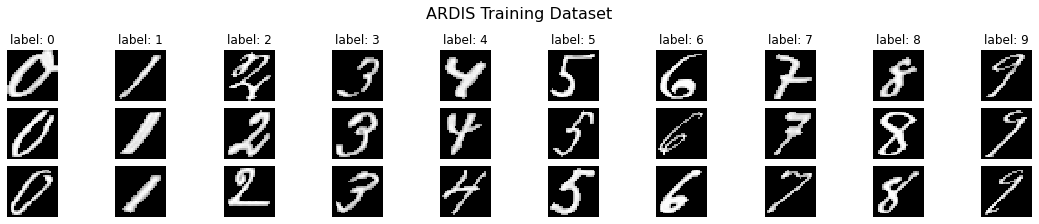

Total number of samples: 6600


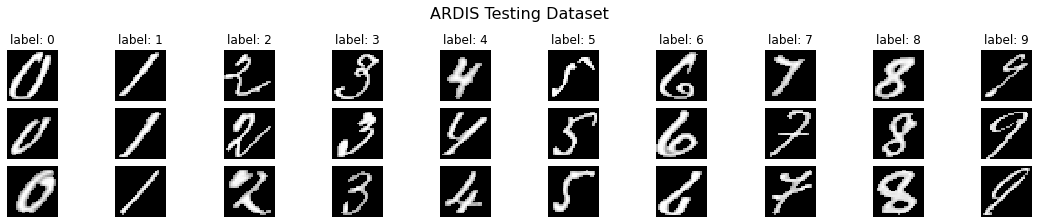

Total number of samples: 1000


In [13]:
utils.plot_random_samples(ardis_x_train, ardis_y_train, title="ARDIS Training Dataset")
utils.plot_random_samples(ardis_x_test, ardis_y_test, title="ARDIS Testing Dataset")

In [14]:
hdf5_filepath = os.path.join(DATASETS, "ardis.hdf5")
utils.store_hdf5(hdf5_filepath, ardis_x_train, ardis_y_train, ardis_x_test, ardis_y_test)

Creating HDF5 dataset and sotre it to: ./datasets/ardis.hdf5 ...
Done.
